# 西安酒店价格统计

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
poi_gpd=pd.read_pickle('../data/poiAll_gpd.pkl') #读取已经存储为.pkl格式的POI数据，其中包括geometry字段，为GeoDataFrame地理信息数据，可以通过poi_gpd.plot()迅速查看数据。

df = poi_gpd.reset_index()
df = df[df.level_0 == 'poi_1_hotel']
df = df.dropna(subset = ['detail_info_price'],axis =0) #删除缺省值
df.head()

,level_0,level_1,name,location_lat,location_lng,detail_info_tag,detail_info_overall_rating,detail_info_price,geometry
11579,poi_1_hotel,1191,志诚丽柏酒店,34.240030,108.912124,酒店;星级酒店,4.6,376,POINT (108.91212 34.24003)
11580,poi_1_hotel,1194,水晶岛酒店,34.213837,108.893900,酒店;其他,4.4,299,POINT (108.89390 34.21384)
11581,poi_1_hotel,1195,西安高新希尔顿酒店,34.226686,108.894191,酒店;星级酒店,4.6,614,POINT (108.89419 34.22669)
11582,poi_1_hotel,1196,西安海升酒店,34.218452,108.891532,酒店;其他,4.6,264,POINT (108.89153 34.21845)
11583,poi_1_hotel,1197,西安天骊君廷大酒店,34.224739,108.919048,酒店;快捷酒店,4.8,655,POINT (108.91905 34.22474)


In [19]:
df.detail_info_price.describe()

count     1396.0
unique     302.0
top         60.0
freq        52.0
Name: detail_info_price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xc864898>,
 'caps': [<matplotlib.lines.Line2D at 0xc8689b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc864c50>],
 'medians': [<matplotlib.lines.Line2D at 0xc86c828>],
 'fliers': [<matplotlib.lines.Line2D at 0xc86c9b0>],
 'means': []}

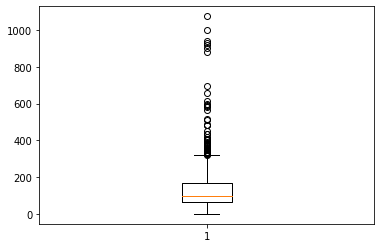

In [20]:
plt.boxplot(df.detail_info_price)

In [23]:
def frequency_bins(df,bins):
    import pandas as pd
    '''function-频数分布计算'''
    
    #A-组织数据
    column_name=df.columns[0]
    column_bins_name=df.columns[0]+'_bins'
    df[column_bins_name]=pd.cut(x=df[column_name],bins=bins,right=False) #参数right=False指定为包含左边值，不包括右边值。
    df_bins=df.sort_values(by=[column_name]) #按照分割区间排序
    df_bins.set_index([column_bins_name,df_bins.index],drop=False,inplace=True) #以price_bins和原索引值设置多重索引，同时配置drop=False参数保留原列。
    #print(df_bins.head(10))
    
    #B-频数计算
    dfBins_frequency=df_bins[column_bins_name].value_counts() #dropna=False  
    dfBins_relativeFrequency=df_bins[column_bins_name].value_counts(normalize=True) #参数normalize=True将计算相对频数(次数) dividing all values by the sum of values
    dfBins_freqANDrelFreq=pd.DataFrame({'fre':dfBins_frequency,'relFre':dfBins_relativeFrequency})
    #print(dfBins_freqANDrelFreq)
    
    #C-组中值计算
    df_bins["price"]=df_bins["price"].astype(float)
    dfBins_median=df_bins.median(level=0)
    dfBins_median.rename(columns={column_name:'median'},inplace=True)
    #print(dfBins_median)
    
    #D-合并分割区间、频数计算和组中值的DataFrame格式数据。
    df_fre=dfBins_freqANDrelFreq.join(dfBins_median).sort_index().reset_index() #在合并时会自动匹配index
    #print(ranmen_fre)
    
    #E-计算频数比例
    df_fre['fre_percent%']=df_fre.apply(lambda row:row['fre']/df_fre.fre.sum()*100,axis=1)
    
    return df_fre
bins=range(0,650,50) #配置分割区间（组距）   
delicacy_price_df = pd.DataFrame()
delicacy_price_df['price'] = df.detail_info_price
poiPrice_fre_50=frequency_bins(delicacy_price_df,bins)    
print(poiPrice_fre_50)


         index  fre    relFre  median  fre_percent%
0      [0, 50)  168  0.121212    39.0     12.121212
1    [50, 100)  523  0.377345    76.0     37.734488
2   [100, 150)  279  0.201299   128.0     20.129870
3   [150, 200)  196  0.141414   178.0     14.141414
4   [200, 250)   98  0.070707   228.0      7.070707
5   [250, 300)   62  0.044733   271.0      4.473304
6   [300, 350)   25  0.018038   320.0      1.803752
7   [350, 400)   17  0.012266   376.0      1.226551
8   [400, 450)    7  0.005051   410.0      0.505051
9   [450, 500)    4  0.002886   482.5      0.288600
10  [500, 550)    2  0.001443   512.0      0.144300
11  [550, 600)    5  0.003608   588.0      0.360750


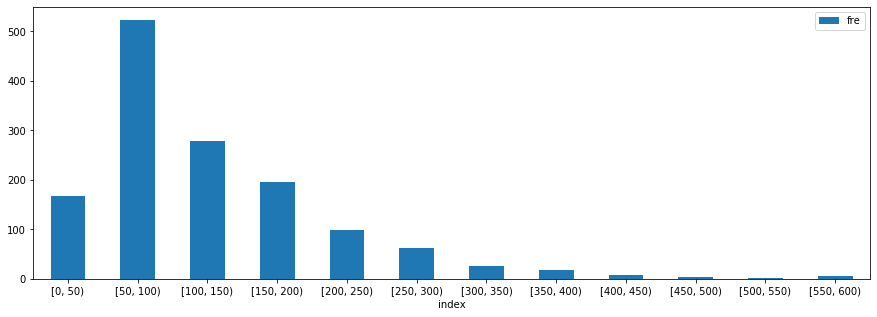

In [24]:
poiPrice_fre_50.loc[:,['fre','index']].plot.bar(x='index',rot=0,figsize=(15,5))